In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice
from superfv.initial_conditions import sod_shock_tube_1d
from teyssier.muscl import cons_to_prim, muscl

In [2]:
N = 100

sim = EulerSolver(
    ic=sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=1,
    riemann_solver="hllct",
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter="moncen",
    SED=True,
)
sim.musclhancock(0.245, allow_overshoot=True)

ut = muscl(
    0.245,
    N,
    ic_type="sod test",
    bc_type="free",
    riemann_solver="hllc",
    slp_type="moncen2",
)
x = (np.arange(ut.shape[2]) + 0.5) / ut.shape[2]
wt = cons_to_prim(ut[-1, :, :])

Step #67 @ t=2.47e-01 | dt=3.63e-03 | min(rho)=1.25e-01, min(P)=1.00e-01 | (done)                   
cell= 100  itermax= 100000
Done  67 0.24701220468899104


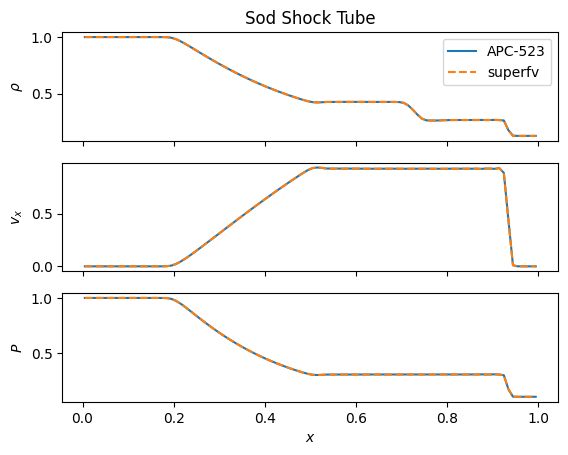

In [3]:
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].set_title("Sod Shock Tube")

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

axs[0].plot(x, wt[0, :], label="APC-523")
plot_1d_slice(sim, axs[0], "rho", label="superfv", cell_averaged=True, linestyle="--")
axs[0].legend()

axs[1].plot(x, wt[1, :], label="APC-523")
plot_1d_slice(sim, axs[1], "vx", label="superfv", cell_averaged=True, linestyle="--")

axs[2].plot(x, wt[2, :], label="APC-523")
plot_1d_slice(
    sim, axs[2], "P", label="superfv", cell_averaged=True, linestyle="--", xlabel=True
)